In [1]:
# Google.colab drive integration
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# specify the desired data location to the current working directory
%cd /content/drive/MyDrive/Dataset

/content/drive/.shortcut-targets-by-id/1hQJhZXCBbc369GWFH06FCrflHQ8EO2xS/Dataset


In [3]:
# Keras prepocessing library
! pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [2]:
# Get the required Library
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2, VGG16

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

#Split The Dataset

In [ ]:
#! pip install split_folders

In [ ]:
# Getting the Dataset's Folder path and the splitted Data's target location

#import splitfolders # or import splitfolders
#input_folder = "/content/drive/MyDrive/Dataset/DatasetV2/WikiArt Art Movements Styles/Sampled_Arts_200" # Change The path depending on your file

# where you want the split datasets saved. one will be created if it does not exist or none is set
#output = "/content/drive/MyDrive/Dataset/DatasetV2/splitdata200" # Change The path depending on your file

# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.
#splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2))

Copying files: 2600 files [10:30,  4.13 files/s]


#Load the Dataset Onto The Train and Val Variable

In [3]:
batch_size = 32

In [8]:
# Training Data Path and Image gen (Normalization)
TRAINING_DIR = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Training"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation Data Path and Image gen (Normalization)
VALIDATION_DIR = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Validation"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)

Found 3120 images belonging to 13 classes.
Found 780 images belonging to 13 classes.


In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Training",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

val_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Validation",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 3120 files belonging to 13 classes.
Using 2496 files for training.
Found 780 files belonging to 13 classes.
Using 156 files for validation.


In [10]:
# Just making sure the library to import things from G Drive Is present
from google.colab import drive
import os # Library to manipulate OS  I.E Copying, changing, and or reading things on folders

directoryTrain = '/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Training' # Change directory depending on your file's path
directoryVal = '/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Validation'

# List the contents of the directory
# Code to Check wether there is file's in the directory or not (Might be useful to debug)
try:
    files = os.listdir(directoryTrain)
    print("Files in directory:", files)
except FileNotFoundError:
    print(f"The directory {directoryTrain} does not exist.")

try:
    files = os.listdir(directoryVal)
    print("Files in directory:", files)
except FileNotFoundError:
    print(f"The directory {directoryVal} does not exist.")

Files in directory: ['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Abstract']
Files in directory: ['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Abstract']


#Check to see if the image is in JPEG Format

In [ ]:
from PIL import Image
import os

def check_image_formats(directory):
    supported_formats = ['JPEG', 'PNG', 'GIF', 'BMP']
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    if img.format not in supported_formats:
                        print(f"Unsupported format: {file_path} ({img.format})")
            except (IOError, SyntaxError) as e:
                print(f"Cannot open file: {file_path} ({e})")

# Check the training data directory
train_directory = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Training"
check_image_formats(train_directory)

# Check the validation data directory
val_directory = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Validation"
check_image_formats(val_directory)

#If the file's extension is not .JPG, Use this code

In [ ]:
def check_and_convert_to_jpeg(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            try:
                with Image.open(file_path) as img:

                    # Check if the file is in WEBP format
                    if img.format == 'WEBP': # Set this to What extension you want to change to JPEG / JPG

                        # Convert to JPEG
                        new_file_path = os.path.splitext(file_path)[0] + '.jpg'
                        img = img.convert('RGB')  # Convert to RGB to ensure JPEG compatibility
                        img.save(new_file_path, 'JPEG')
                        print(f"Converted {file_path} to {new_file_path}")
                        os.remove(file_path)  # Remove the original WEBP file / the extension that you set

            except (IOError, SyntaxError) as e:
                print(f"Cannot open file: {file_path} ({e})")

# Check and convert files in the training data directory
train_directory = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Training"
check_and_convert_to_jpeg(train_directory)

# Check and convert files in the validation data directory
val_directory = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Split_300/Validation"
check_and_convert_to_jpeg(val_directory)

In [ ]:
# Load training data
#train_data = tf.keras.utils.image_dataset_from_directory(
  #"/content/drive/MyDrive/Dataset/DatasetV2/splitdata200/train",
  #image_size=(224, 224),
  #batch_size=batch_size,
  #seed=123
#)

# Load validation data
#val_data = tf.keras.utils.image_dataset_from_directory(
  #"/content/drive/MyDrive/Dataset/DatasetV2/splitdata200/val",
  #image_size=(224, 224),
  #batch_size=batch_size,
  #seed=123
#)

In [ ]:
# Use MobileNetV2 as the base model
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [11]:
#Define the model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (224,224,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(13)   #Adding the Output Layer
])

In [12]:
# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Custom Callbacks

In [ ]:
class AccuracyThresholdCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print('\nReached 95% accuracy for both training and validation. Stopping training.')
            self.model.stop_training = True

callback = AccuracyThresholdCallback()

#Training Models

In [14]:
model2.fit(train_data,
          validation_data=val_data,
          epochs=50)

Epoch 1/50
78/78 [==============================] - 62s 689ms/step - loss: 2.3912 - accuracy: 0.1591 - val_loss: 2.1457 - val_accuracy: 0.2436
Epoch 2/50
78/78 [==============================] - 59s 690ms/step - loss: 2.0547 - accuracy: 0.3017 - val_loss: 2.0223 - val_accuracy: 0.3462
Epoch 3/50
78/78 [==============================] - 59s 691ms/step - loss: 1.8666 - accuracy: 0.3650 - val_loss: 1.9779 - val_accuracy: 0.3590
Epoch 4/50
78/78 [==============================] - 58s 680ms/step - loss: 1.6951 - accuracy: 0.4307 - val_loss: 1.9698 - val_accuracy: 0.3526
Epoch 5/50
78/78 [==============================] - 58s 658ms/step - loss: 1.5085 - accuracy: 0.5032 - val_loss: 2.0069 - val_accuracy: 0.3846
Epoch 6/50
78/78 [==============================] - 58s 659ms/step - loss: 1.2824 - accuracy: 0.5705 - val_loss: 2.1967 - val_accuracy: 0.3654
Epoch 7/50
78/78 [==============================] - 57s 657ms/step - loss: 1.0059 - accuracy: 0.6719 - val_loss: 2.7250 - val_accuracy: 0.3590

In [16]:
# Save the model
model2.save('model2_ArtNaon.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# You can also use this cell as a shortcut for downloading your model
from google.colab import files
files.download("model2_ArtNaon.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#The Confusion Matrix

25/25 [==============================] - 22s 882ms/step


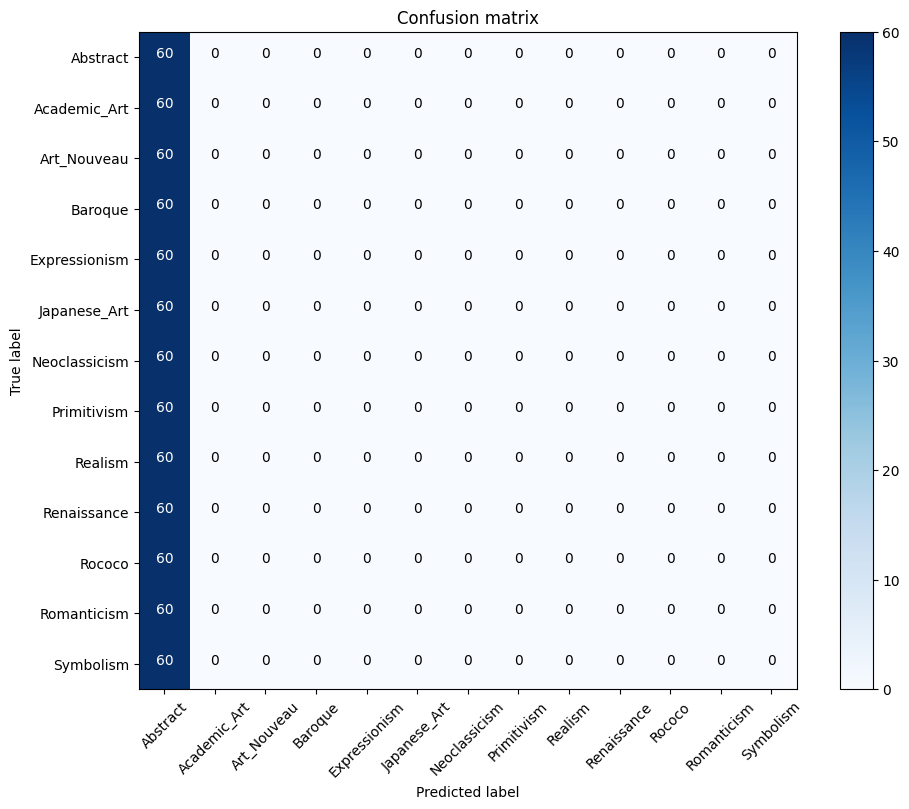

In [45]:
Y_pred = model2.predict(validation_generator, validation_generator.samples // batch_size + 1)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
Y_true = validation_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Class names
class_names = list(validation_generator.class_indices.keys())

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}" if normalize else cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix with class names
plot_confusion_matrix(confusion_mtx, classes=class_names)
plt.show()

In [46]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, None, None, None   0         
                             )                                   
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 16)    448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 16)    0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                      

In [47]:
class_indices = train_generator.class_indices
print(class_indices)

{'Abstract': 0, 'Academic_Art': 1, 'Art_Nouveau': 2, 'Baroque': 3, 'Expressionism': 4, 'Japanese_Art': 5, 'Neoclassicism': 6, 'Primitivism': 7, 'Realism': 8, 'Renaissance': 9, 'Rococo': 10, 'Romanticism': 11, 'Symbolism': 12}


#Testing

1/1 [==============================] - 0s 84ms/step


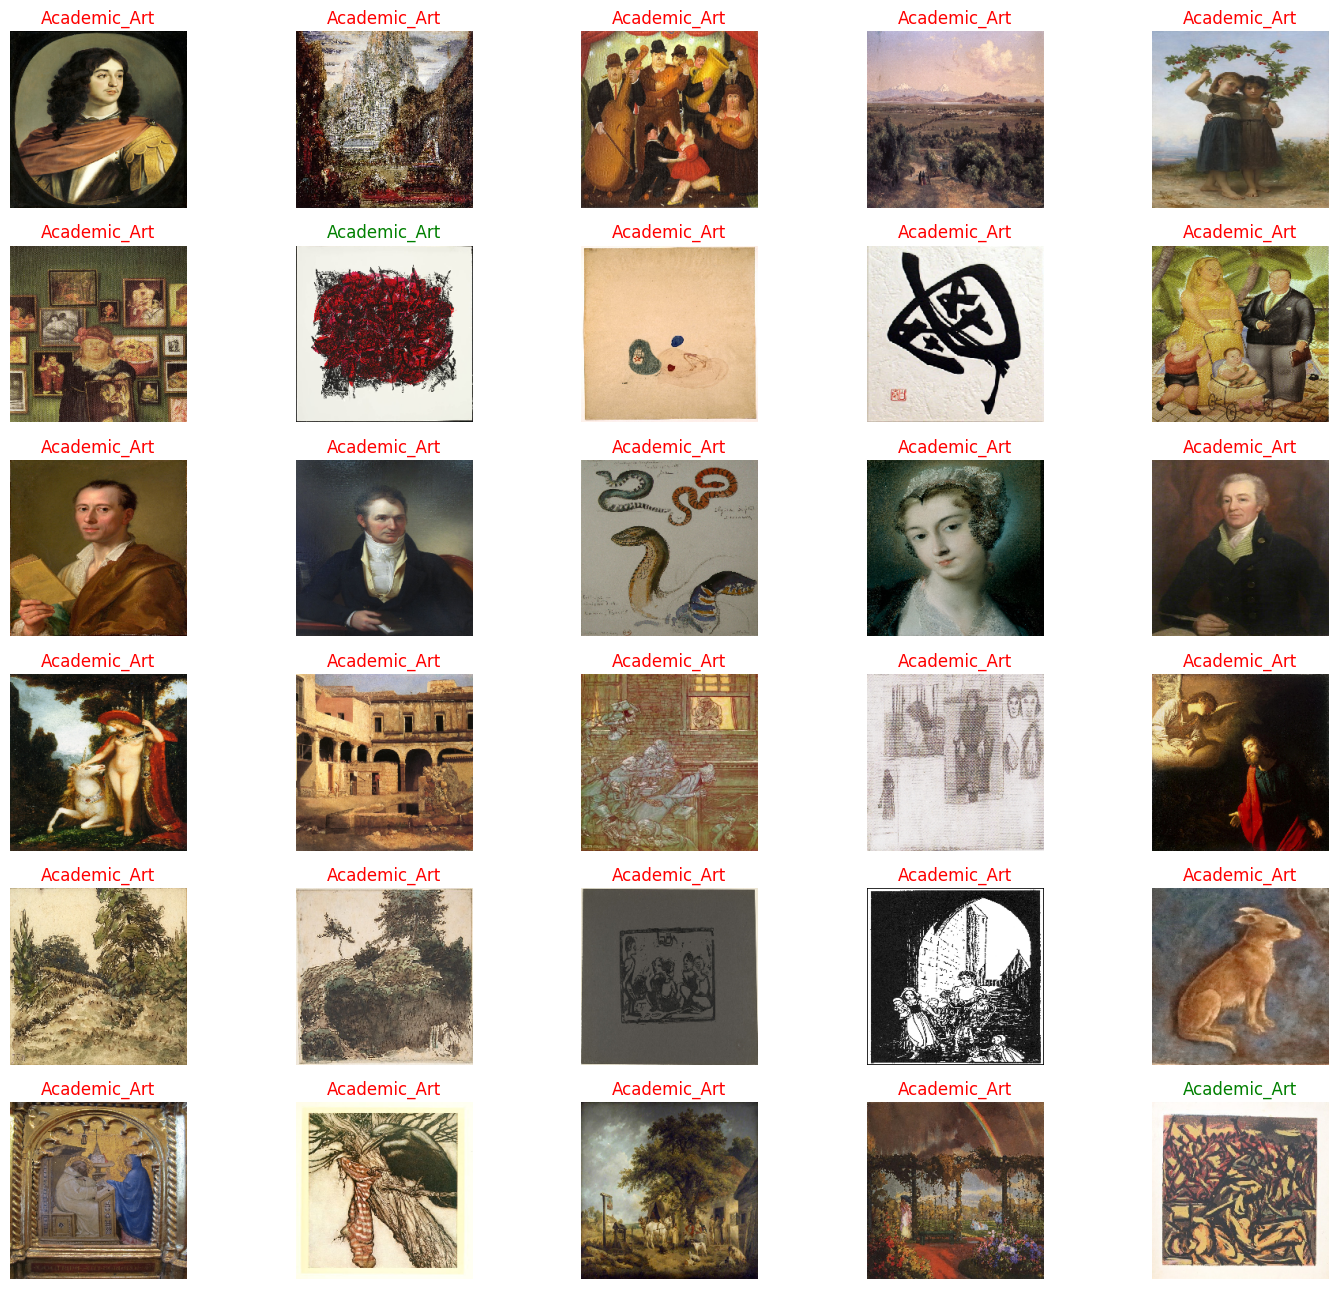

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Model/model2_ArtNaon.h5')

# Assuming validation_generator is already set up and is part of the code that was provided
# Make sure to use the correct directory for the validation data
# validation_generator = ...

# Get a batch of images from the validation generator
img, labels = next(validation_generator)

# Define the class indices (mapping) as obtained previously
class_indices = {
    'Academic_Art': 0, 'Art_Nouveau': 1, 'Baroque': 2, 'Expressionism': 3, 'Japanese_Art': 4,
    'Neoclassicism': 5, 'Primitivism': 6, 'Realism': 7, 'Renaissance': 8, 'Rococo': 9,
    'Romanticism': 10, 'Symbolism': 11, 'Abstract': 12
}

# Reverse the class indices dictionary to map indices to class names for display
indices_class = {v: k for k, v in class_indices.items()}

# Predict the class of each image in the batch
predictions = model.predict(img)

# Set up the figure for plotting images
plt.figure(figsize=(15, 13))

# Plot each image in the batch
for i in range(30):  # Assuming you want to plot 30 images
    ax = plt.subplot(6, 5, i + 1)  # Adjust the number of rows and cols accordingly
    plt.imshow(img[i])

    # Get the predicted and true labels
    predicted_label = indices_class[np.argmax(predictions[i])]
    true_label = indices_class[np.argmax(labels[i])]

    # Set the title of each plot to the predicted label
    # If the prediction is correct, the title is set in green; otherwise, it's set in red
    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(predicted_label, color=title_color)
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#Model 3

(32, 224, 224, 3)
Academic_Art


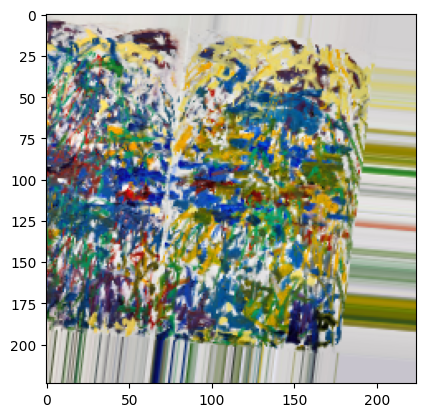

(32, 224, 224, 3)
Abstract


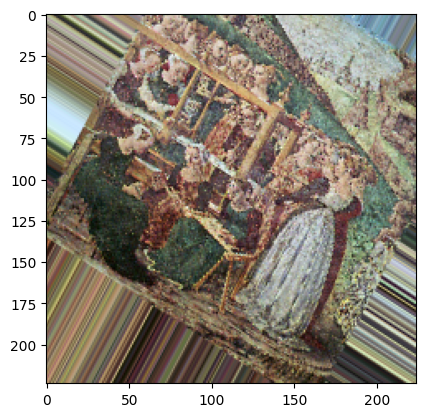

(32, 224, 224, 3)
Academic_Art


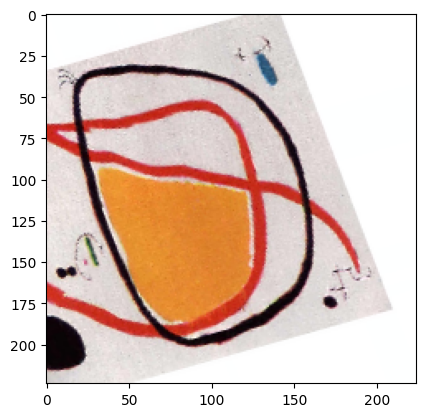

(32, 224, 224, 3)
Abstract


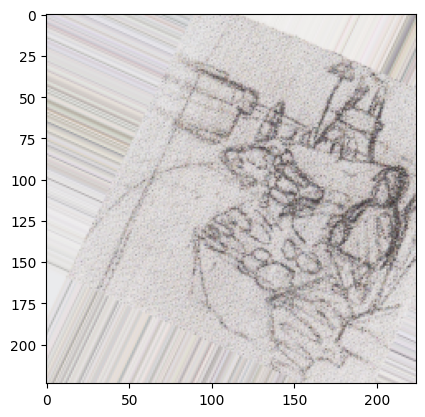

(32, 224, 224, 3)
Abstract


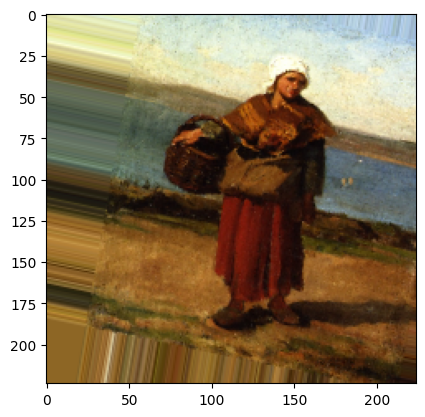

In [29]:
import numpy as np
# Get the label to string mapping
label_to_str = {v: k for k, v in train_generator.class_indices.items()}

# Display some artworks
for _ in range(5):
    img, label = train_generator.next()
    random_index = np.random.randint(0, img.shape[0])
    image = img[random_index]
    image_label = label[random_index]
    print(img.shape)
    plt.imshow(image)
    label_list = image_label.tolist()
    print(label_to_str[label_list[0]])
    plt.show()

In [33]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(16,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(13, activation='softmax')   #Adding the Output Layer
])


In [34]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [35]:
history = model3.fit(train_data,
          validation_data=val_data,
          epochs=20)

Epoch 1/20
78/78 [==============================] - 63s 674ms/step - loss: 2.3896 - accuracy: 0.1611 - val_loss: 2.2972 - val_accuracy: 0.2372
Epoch 2/20
78/78 [==============================] - 61s 720ms/step - loss: 2.0379 - accuracy: 0.3053 - val_loss: 2.0586 - val_accuracy: 0.3654
Epoch 3/20
78/78 [==============================] - 59s 698ms/step - loss: 1.8387 - accuracy: 0.3770 - val_loss: 1.9675 - val_accuracy: 0.3974
Epoch 4/20
78/78 [==============================] - 58s 678ms/step - loss: 1.6359 - accuracy: 0.4555 - val_loss: 1.9628 - val_accuracy: 0.3526
Epoch 5/20
78/78 [==============================] - 57s 674ms/step - loss: 1.3903 - accuracy: 0.5513 - val_loss: 1.9849 - val_accuracy: 0.4231
Epoch 6/20
78/78 [==============================] - 64s 759ms/step - loss: 1.1700 - accuracy: 0.6210 - val_loss: 2.0827 - val_accuracy: 0.4231
Epoch 7/20
78/78 [==============================] - 58s 682ms/step - loss: 0.8813 - accuracy: 0.7147 - val_loss: 2.3793 - val_accuracy: 0.3846

In [36]:
# Save the model
model2.save('model3_ArtNaon.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
#Download model
from google.colab import files
files.download("model3_ArtNaon.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

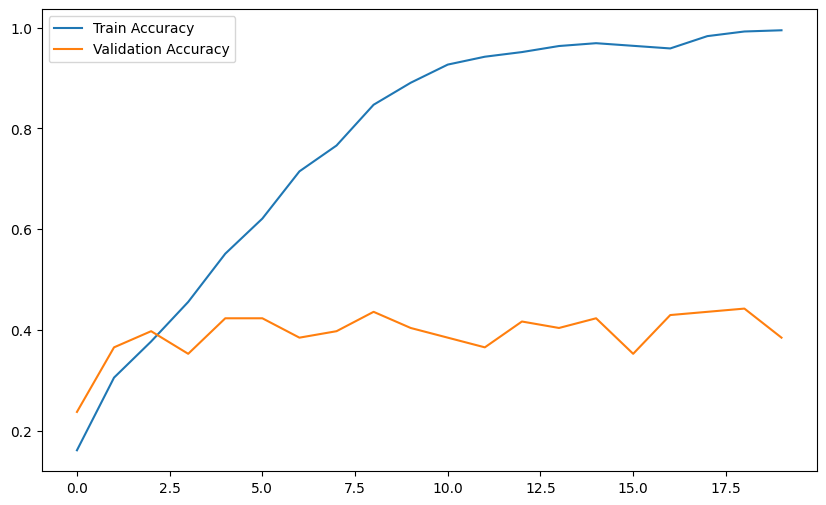

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

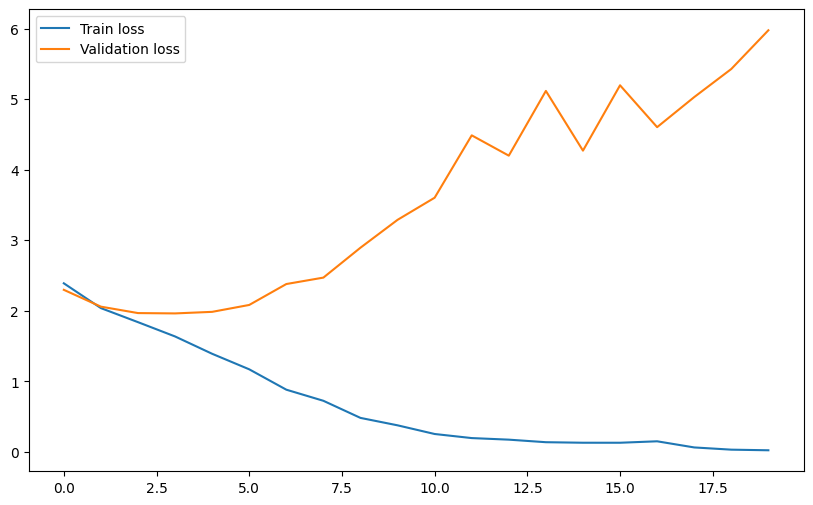

In [51]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [55]:
class_indices = train_generator.class_indices
print(class_indices)

{'Abstract': 0, 'Academic_Art': 1, 'Art_Nouveau': 2, 'Baroque': 3, 'Expressionism': 4, 'Japanese_Art': 5, 'Neoclassicism': 6, 'Primitivism': 7, 'Realism': 8, 'Renaissance': 9, 'Rococo': 10, 'Romanticism': 11, 'Symbolism': 12}


In [52]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 56, 56, 64)       

#Testing Model 3

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Model/model3_ArtNaon.h5')

# Assuming validation_generator is already set up and is part of the code that was provided
# Make sure to use the correct directory for the validation data
# validation_generator = ...

# Get a batch of images from the validation generator
img, labels = next(validation_generator)

# Define the class indices (mapping) as obtained previously
class_indices = {
    'Academic_Art': 0, 'Art_Nouveau': 1, 'Baroque': 2, 'Expressionism': 3, 'Japanese_Art': 4,
    'Neoclassicism': 5, 'Primitivism': 6, 'Realism': 7, 'Renaissance': 8, 'Rococo': 9,
    'Romanticism': 10, 'Symbolism': 11, 'Abstract': 12
}

# Reverse the class indices dictionary to map indices to class names for display
indices_class = {v: k for k, v in class_indices.items()}

# Predict the class of each image in the batch
predictions = model.predict(img)

# Set up the figure for plotting images
plt.figure(figsize=(15, 13))

# Plot each image in the batch
for i in range(30):  # Assuming you want to plot 30 images
    ax = plt.subplot(6, 5, i + 1)  # Adjust the number of rows and cols accordingly
    plt.imshow(img[i])

    # Get the predicted and true labels
    predicted_label = indices_class[np.argmax(predictions[i])]
    true_label = indices_class[np.argmax(labels[i])]

    # Set the title of each plot to the predicted label
    # If the prediction is correct, the title is set in green; otherwise, it's set in red
    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(predicted_label, color=title_color)
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


ValueError: The channel dimension of the inputs should be defined. The input_shape received is (None, None, None, None), where axis -1 (0-based) is the channel dimension, which found to be `None`.